In [16]:
## Packages
library(dplyr)
library(stringr)
library(broom)
library(ggplot2)


In [2]:
## Read data in, change path as necessary

# One line per election
elections_2016 <- read.csv("2016_election_results_wide.csv")

# One line per candidate
elections_2016_long <- read.csv("2016_election_results_long.csv")

# One line per election
elections_2018 <- read.csv("2018_election_results_wide.csv") %>%
    select(-X.1) # I don't know why there's an X.1 (or X) column but just easier to get rid of it here

# One line per candidate
elections_2018_long <- read.csv("2018_election_results_long.csv")

head(elections_2016)
head(elections_2016_long)
head(elections_2018)
head(elections_2018_long)


,X,Democrat,Republican,Other,State,Year,District,Democrat.Incumbent,Democrat.Votes,Republican.Incumbent,Republican.Votes,Other.Incumbent,Other.Votes,gender_Dem,gender_Rep,winner_party,winner_gender,Democrat.Vote.Prop,Republican.Vote.Prop
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,Scott J. Kawasaki,No candidate,No candidate,Alaska,2016,1,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000
2,2,Truno Holdaway,Steve M. Thompson,No candidate,Alaska,2016,2,False,1153,True,3268,0,0,Unknown,male,Republican,male,0.26080072,0.7391993
3,3,Christina M. Sinclair,Tammie Wilson,Jeanne Olson,Alaska,2016,3,False,537,True,4291,False,2270,female,female,Republican,female,0.07565511,0.6045365
4,4,David Guttenberg,No candidate,No candidate,Alaska,2016,4,True,1,False,0,0,0,male,N/A,Democrat,male,1.00000000,0.0000000
5,5,Adam Wool,Aaron Lojewski,No candidate,Alaska,2016,5,True,3812,False,3384,0,0,male,male,Democrat,male,0.52973874,0.4702613
6,6,Jason T. Land,David M. Talerico,No candidate,Alaska,2016,6,False,2327,True,5126,0,0,male,male,Republican,male,0.31222327,0.6877767


,X,Candidate,State,District,Year,Incumbent,Votes,Vote.Prop,Gender,winner_party,Candidate.Party
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,1,Scott J. Kawasaki,Alaska,1,2016,True,1,1.00000000,male,Democrat,Democrat
2,2,Truno Holdaway,Alaska,2,2016,False,1153,0.26080072,Unknown,Republican,Democrat
3,3,Christina M. Sinclair,Alaska,3,2016,False,537,0.07565511,female,Republican,Democrat
4,4,David Guttenberg,Alaska,4,2016,True,1,1.00000000,male,Democrat,Democrat
5,5,Adam Wool,Alaska,5,2016,True,3812,0.52973874,male,Democrat,Democrat
6,6,Jason T. Land,Alaska,6,2016,False,2327,0.31222327,male,Republican,Democrat


,X,state,district,office,candidate_other,candidate_republican,candidate_democrat,total_votes_other,total_votes_republican,total_votes_democrat,vote_share_dem,vote_share_rep,vote_share_other,winner_party,gender_democrat,gender_republican,winner_gender,year
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,Alabama,District 1,State Representative,Bobby James Dolan III,Phillip Pettus,No candidate,4336,7348,0,0.0000000,0.6288942,0.37110579,Republican,N/A,male,male,2018
2,2,Alabama,District 1,State Senator,No candidate,Tim Melson,Caroline Self,0,33141,15830,0.3232525,0.6767475,0.00000000,Republican,female,male,male,2018
3,3,Alabama,District 10,State Representative,Elijah J. Boyd,Mike Ball,J.B. King,1130,11240,8565,0.4091235,0.5368999,0.05397659,Republican,Unknown,male,male,2018
4,4,Alabama,District 10,State Senator,Craig Ford,Andrew Jones,No candidate,16759,25902,0,0.0000000,0.6071588,0.39284124,Republican,N/A,male,male,2018
5,5,Alabama,District 100,State Representative,No candidate,Victor Gaston,No candidate,0,12086,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018
6,6,Alabama,District 101,State Representative,No candidate,Chris Pringle,No candidate,0,10274,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018


,X,year,state,district,office,Candidate,Votes,Vote.Prop,Gender,winner_party,Candidate.Party
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,1,2018,Alabama,District 1,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat
2,2,2018,Alabama,District 1,State Senator,Caroline Self,15830,0.3232525,female,Republican,Democrat
3,3,2018,Alabama,District 10,State Representative,J.B. King,8565,0.4091235,Unknown,Republican,Democrat
4,4,2018,Alabama,District 10,State Senator,No candidate,0,0.0000000,N/A,Republican,Democrat
5,5,2018,Alabama,District 100,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat
6,6,2018,Alabama,District 101,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat


`summarise()` regrouping output by 'Year' (override with `.groups` argument)

`summarise()` regrouping output by 'Year' (override with `.groups` argument)



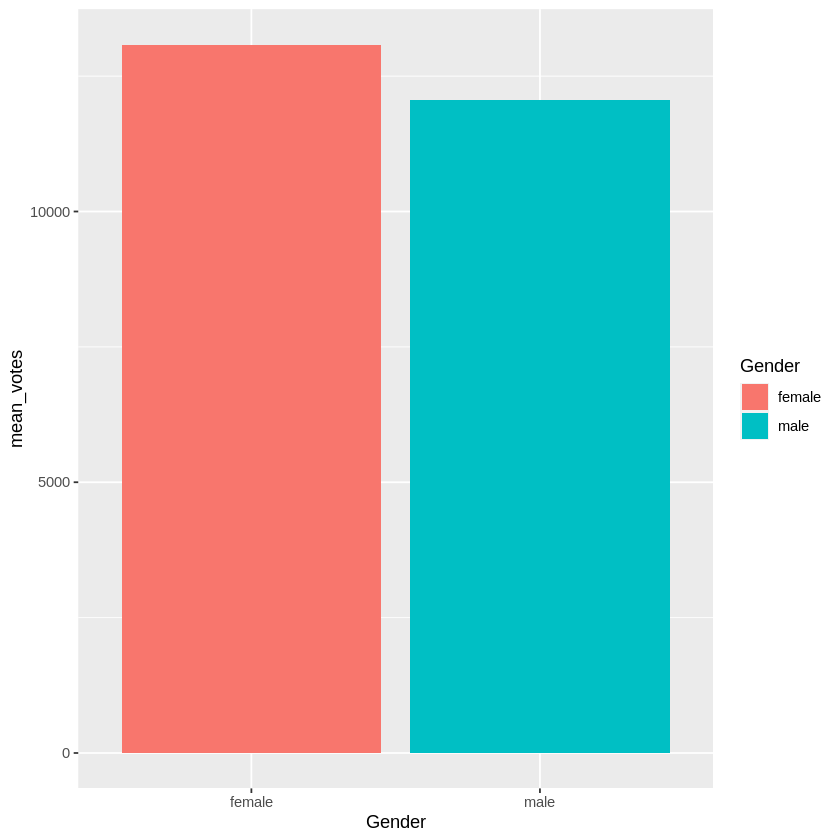

`summarise()` ungrouping output (override with `.groups` argument)



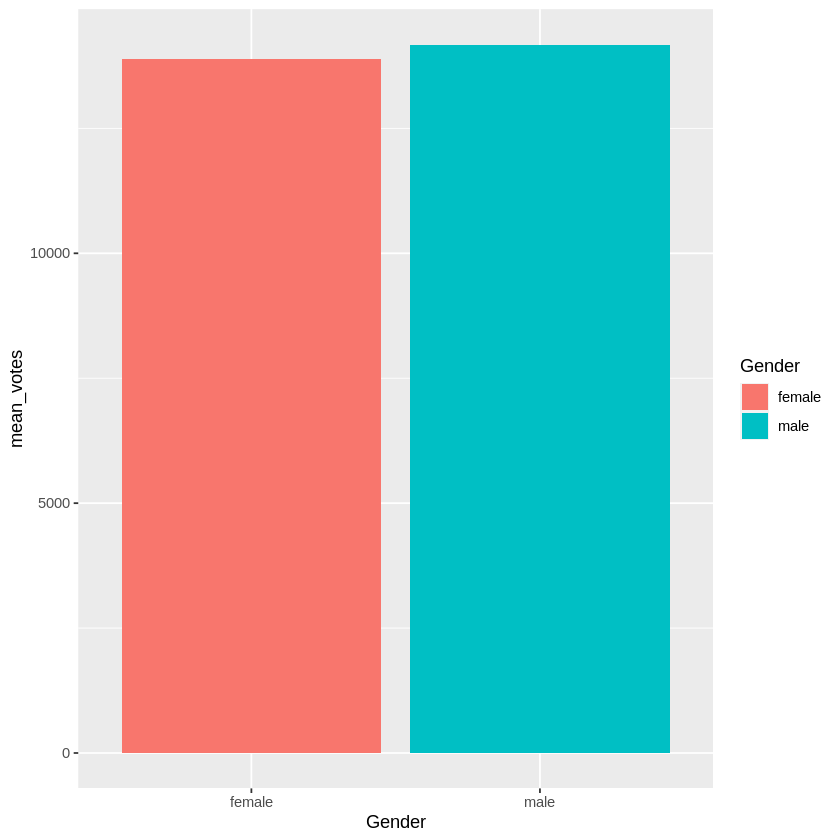

`summarise()` ungrouping output (override with `.groups` argument)



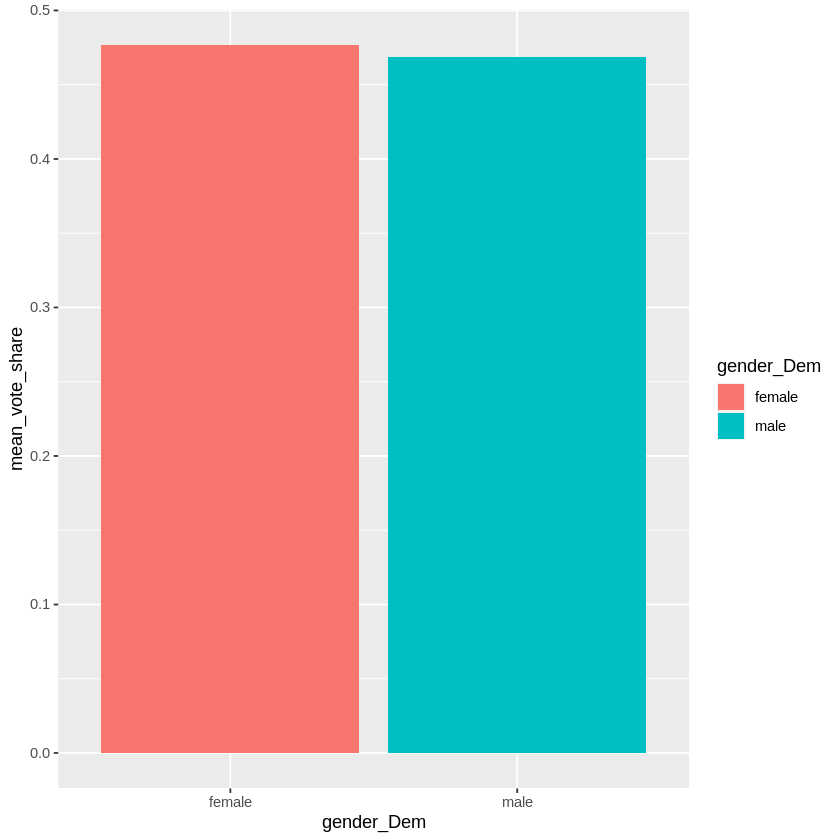

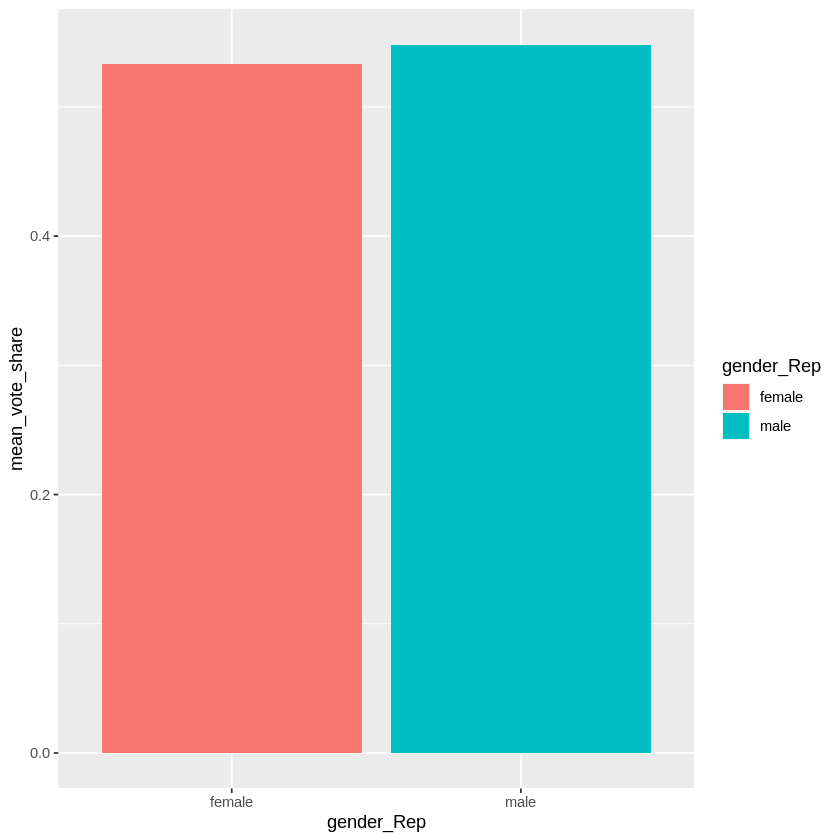

In [3]:
## Basic descriptives for 2016, separated by party

elections_2016_long %>%
    filter(Candidate.Party == "Democrat", Gender %in% c("male", "female"), !is.na(Votes)) %>%
    group_by(Year, Gender) %>%
    summarize(mean_votes = mean(Votes)) %>%
    ggplot(aes(x = Gender, y = mean_votes, fill = Gender)) + 
        geom_bar(stat = "identity")


elections_2016_long %>%
    filter(Candidate.Party == "Republican", Gender %in% c("male", "female"), !is.na(Votes)) %>%
    group_by(Year, Gender) %>%
    summarize(mean_votes = mean(Votes)) %>%
    ggplot(aes(x = Gender, y = mean_votes, fill = Gender)) + 
        geom_bar(stat = "identity")



elections_2016 %>%
    group_by(gender_Dem) %>%
    filter(gender_Dem %in% c("male", "female"), !is.na(Democrat.Vote.Prop), !Democrat.Vote.Prop == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(Democrat.Vote.Prop)) %>%
    ggplot(aes(x = gender_Dem, y = mean_vote_share, fill = gender_Dem)) + 
        geom_bar(stat = "identity")

elections_2016 %>%
    group_by(gender_Rep) %>%
    filter(gender_Rep %in% c("male", "female"), !is.na(Republican.Vote.Prop), !Republican.Vote.Prop == 1) %>%
    summarize(count = n(),
              mean_vote_share = mean(Republican.Vote.Prop)) %>% 
    ggplot(aes(x = gender_Rep, y = mean_vote_share, fill = gender_Rep)) + 
        geom_bar(stat = "identity")



In [14]:

## Creates list of states where the % diff in gender of winning candidates is > 5% and list the difference
# Doesn't work yet, working on it
elections_2016%>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(State, District, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    summarize(prop_diff = max(prop) - min(prop)) %>%
    filter(abs(prop_diff) > 0.05)


`summarise()` regrouping output by 'State', 'District' (override with `.groups` argument)

`summarise()` regrouping output by 'State' (override with `.groups` argument)



State,District,prop_diff
<chr>,<chr>,<dbl>


In [17]:
## Graphs (need to change vote total to vote share, vote total is bad stats), also just needs general proofreading

  summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    summarize(prop_diff = max(prop) - min(prop)) %>%
    filter(abs(prop_diff) > 0.05)

elections_2016 %>%
    group_by(Year, gender_Dem) %>%
    filter(gender_Dem %in% c("male", "female"), !is.na(Democrat.Votes)) %>%
    summarize(count = n(), 
              mean_votes = mean(Democrat.Votes)) %>%
    ggplot(aes(x = gender_Dem, y = mean_votes, fill = gender_Dem)) + 
        geom_bar(stat = "identity") + 
        labs(title = "Vote Share by Gender, Democratic Party, 2016",
            y = "Average Total Votes",
            x = "Gender") +
        theme(legend.position = "none")

elections_2016 %>%
    group_by(Year, gender_Rep) %>%
    filter(gender_Rep %in% c("male", "female"), !is.na(Republican.Votes)) %>%
    summarize(count = n(),
              mean_votes = mean(Republican.Votes)) %>%
    ggplot(aes(x = gender_Rep, y = mean_votes, fill = gender_Rep)) + 
        geom_bar(stat = "identity") +
        labs(title = "Vote Share by Gender, Republican Party, 2016",
            y = "Average Total Votes",
            x = "Gender") +
        theme(legend.position = "none")


## Tables  (need to work on this whole section, not currently working)
elections_2016 %>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(gender_Dem, gender_Rep, winner_party) %>%
    summarize(count = n())

elections_2016 %>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(State, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()


##Vote Prop of winning candidates
elections_2016 %>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(State, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    head()

elections_2016 %>% 
    filter(gender_Dem %in% c("male", "female"), gender_Rep %in% c("male", "female")) %>%
    group_by(State, winner_gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count/sum(count)) %>%
    summarize(prop_diff = max(prop) - min(prop)) %>% # This calculation only works with paired rows, e.g. row 1 is State A Males, row 2 is State A Females, etc. tbh prob better to do these kind of calculations with wide datasets, will look at later
    filter(abs(prop_diff) > 0.05) %>%
    head()


ERROR: Error: `n()` must only be used inside dplyr verbs.


In [19]:
head (elections_2018_long)
head(elections_2018)

,X,year,state,district,office,Candidate,Votes,Vote.Prop,Gender,winner_party,Candidate.Party
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,1,2018,Alabama,District 1,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat
2,2,2018,Alabama,District 1,State Senator,Caroline Self,15830,0.3232525,female,Republican,Democrat
3,3,2018,Alabama,District 10,State Representative,J.B. King,8565,0.4091235,Unknown,Republican,Democrat
4,4,2018,Alabama,District 10,State Senator,No candidate,0,0.0000000,N/A,Republican,Democrat
5,5,2018,Alabama,District 100,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat
6,6,2018,Alabama,District 101,State Representative,No candidate,0,0.0000000,N/A,Republican,Democrat


,X,state,district,office,candidate_other,candidate_republican,candidate_democrat,total_votes_other,total_votes_republican,total_votes_democrat,vote_share_dem,vote_share_rep,vote_share_other,winner_party,gender_democrat,gender_republican,winner_gender,year
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,Alabama,District 1,State Representative,Bobby James Dolan III,Phillip Pettus,No candidate,4336,7348,0,0.0000000,0.6288942,0.37110579,Republican,N/A,male,male,2018
2,2,Alabama,District 1,State Senator,No candidate,Tim Melson,Caroline Self,0,33141,15830,0.3232525,0.6767475,0.00000000,Republican,female,male,male,2018
3,3,Alabama,District 10,State Representative,Elijah J. Boyd,Mike Ball,J.B. King,1130,11240,8565,0.4091235,0.5368999,0.05397659,Republican,Unknown,male,male,2018
4,4,Alabama,District 10,State Senator,Craig Ford,Andrew Jones,No candidate,16759,25902,0,0.0000000,0.6071588,0.39284124,Republican,N/A,male,male,2018
5,5,Alabama,District 100,State Representative,No candidate,Victor Gaston,No candidate,0,12086,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018
6,6,Alabama,District 101,State Representative,No candidate,Chris Pringle,No candidate,0,10274,0,0.0000000,1.0000000,0.00000000,Republican,N/A,male,male,2018


In [95]:
elections_2018_long%>% 
    filter(Candidate.Party == "Democrat", Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 


elections_2016_long %>%
 filter(Candidate.Party == "Democrat", Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 


#overall vote.prop averages for Dem candidates by gender in races which weren't unopposed

`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4959815
male,0.4984242


`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4770327
male,0.4688065


In [96]:
elections_2018_long%>% 
    filter(Candidate.Party == "Republican", Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 

elections_2016_long %>%
filter(Candidate.Party == "Republican", Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean(Vote.Prop)) 
#overall vote.prop averages for Repub candidates by gender in races which weren't unopposed
#2016 numbers off or would these higher props be due to other party candidates?

`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4846782
male,0.5174242


`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.5332860
male,0.5482527


In [97]:
elections_2018_long%>% 
    filter(Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 

elections_2016_long%>% 
    filter(Gender %in% c("male", "female"), Vote.Prop !=1)%>%
    group_by(Gender)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) 


#overall props by gender regardless of party
#highers props due to other party candidates?

`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4922897
male,0.5099602


`summarise()` ungrouping output (override with `.groups` argument)



Gender,mean_gen_prop
<chr>,<dbl>
female,0.4983212
male,0.5132029


In [98]:
elections_2018_long%>% 
    filter(Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

elections_2018_long%>% 
    filter(Candidate.Party == "Democrat", Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

elections_2018_long%>% 
    filter(Candidate.Party == "Republican", Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(state)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()


#average voting props for women candidates grouped by state
elections_2016_long%>% 
    filter(Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(State)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

elections_2016_long%>% 
    filter(Candidate.Party == "Democrat", Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(State)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

elections_2016_long%>% 
    filter(Candidate.Party == "Republican", Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(State)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

#was hoping to find differences in vote prop for women candidates by state between 2016 and 2018, splitting into parties as well
#is there a way to join between corresponding 2016 and 2018 summaries, then subtracting out?

`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.4260917
Alaska,0.5001140
Arizona,0.4911919
Arkansas,0.4934839
California,0.4902475
Colorado,0.5134712


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.3569806
Alaska,0.4412298
Arizona,0.4784230
Arkansas,0.4236310
California,0.5509966
Colorado,0.5468281


`summarise()` ungrouping output (override with `.groups` argument)



state,mean_gen_prop
<chr>,<dbl>
Alabama,0.7124091
Alaska,0.5861756
Arizona,0.5160577
Arkansas,0.5866211
California,0.3943279
Colorado,0.4546060


`summarise()` ungrouping output (override with `.groups` argument)



State,mean_gen_prop
<chr>,<dbl>
Alaska,0.4671111
Arkansas,0.4528645
California,0.4902361
Colorado,0.5264582
Connecticut,0.5081141
Delaware,0.4445916


`summarise()` ungrouping output (override with `.groups` argument)



State,mean_gen_prop
<chr>,<dbl>
Alaska,0.3447284
Arkansas,0.3560999
California,0.5698057
Colorado,0.5197604
Connecticut,0.5109482
Delaware,0.4456568


`summarise()` ungrouping output (override with `.groups` argument)



State,mean_gen_prop
<chr>,<dbl>
Alaska,0.5612517
Arkansas,0.5818840
California,0.3672649
Colorado,0.5355200
Connecticut,0.5036783
Delaware,0.4427276


In [94]:
elections_2018_long%>% 
    filter(Gender %in% c("female"), Vote.Prop !=1)%>%
    group_by(district)  %>%
summarise (mean_gen_prop= mean (Vote.Prop)) %>% head()

#idea was to use process above (if someone finds it), and use at district level as well
#does this make sense at this level as something to find?


`summarise()` ungrouping output (override with `.groups` argument)



district,mean_gen_prop
<chr>,<dbl>
Addison-1,0.6559154
Addison-2,0.7564767
Addison-3,0.6562926
Addison-4,0.7061595
Addison-5,0.6430793
Addison-Rutland,0.4981745


In [107]:

reg <- lm (Vote.Prop~ Candidate.Party+state+district+ Gender,elections_2018_long  %>% filter (Gender %in% c("male", "female"), Vote.Prop !=1))
library (broom)
tidy (reg)

#regression looking at effect of gender on voting share in 2018

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.4866956761,0.123553350,3.939154026,0.0000825866
Candidate.PartyRepublican,0.0129965288,0.004162066,3.122614713,0.0018000394
stateAlaska,-0.0116466787,0.025973678,-0.448403142,0.6538765469
stateArizona,-0.0013909628,0.022170101,-0.062740479,0.9499750057
stateArkansas,0.0131634747,0.024571804,0.535714624,0.5921732980
stateCalifornia,0.0088461672,0.020820103,0.424885852,0.6709333185
stateColorado,-0.0053154948,0.022366892,-0.237650127,0.8121596205
stateConnecticut,0.0001215066,0.018161038,0.006690508,0.9946619827
stateDelaware,0.0019992624,0.026274626,0.076090995,0.9393489407


In [109]:
reg <- lm (Vote.Prop~ Candidate.Party+State+District+ Gender,elections_2016_long  %>% filter (Gender %in% c("male", "female"), Vote.Prop !=1))
library (broom)
tidy (reg)

#regression for 2016

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.485669915,0.038748395,12.5339362,2.440616e-35
Candidate.PartyRepublican,0.074642139,0.005381575,13.8699429,1.059260e-42
StateArkansas,0.044402357,0.033946092,1.3080256,1.909443e-01
StateCalifornia,0.016664237,0.029336513,0.5680374,5.700434e-01
StateColorado,0.007487220,0.029687920,0.2521975,8.009021e-01
StateConnecticut,0.023959306,0.027609330,0.8677974,3.855604e-01
StateDelaware,0.044900262,0.037803907,1.1877149,2.350205e-01
StateFlorida,0.027355819,0.029486755,0.9277324,3.536057e-01
StateGeorgia,0.009197543,0.034289920,0.2682288,7.885379e-01
